In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras import layers, models
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

2024-04-18 23:36:23.606910: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#load check.csv

check = pd.read_csv('/Users/Aash/Desktop/Python/Words/check.csv')


In [3]:

# Assume that all columns except 'label' are features
X = check.drop('label', axis=1).values

# Assume that the 'label' column is the target
y = check['label'].values

In [4]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object with desired feature range
scaler = MinMaxScaler(feature_range=(-1, 1))

# Fit and transform your data
X_trainScaled = scaler.fit_transform(X_train)
X_testScaled = scaler.transform(X_test)



In [6]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=14)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=14)

In [7]:
model = models.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_trainScaled.shape[1],)),
    layers.Dropout(0.1),
    layers.Dense(26, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(14, activation='softmax')
])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00005)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
X_train.shape

(16800, 21)

In [10]:
history = model.fit(X_trainScaled, y_train, epochs=30, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/30
420/420 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1032 - loss: 2.6371 - val_accuracy: 0.1738 - val_loss: 2.5543
Epoch 2/30
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1751 - loss: 2.5369 - val_accuracy: 0.2688 - val_loss: 2.4340
Epoch 3/30
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2693 - loss: 2.4112 - val_accuracy: 0.4304 - val_loss: 2.2918
Epoch 4/30
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3621 - loss: 2.2712 - val_accuracy: 0.5940 - val_loss: 2.1197
Epoch 5/30
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4664 - loss: 2.1097 - val_accuracy: 0.7086 - val_loss: 1.9292
Epoch 6/30
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5433 - loss: 1.9206 - val_accuracy: 0.7545 - val_loss: 1.7261
Epoch 7/30
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6012 - loss: 1.7279 - val_accuracy: 0.7714 - val_loss: 1.5168
Epoch 8/30
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6427 - loss: 1.5403 - val_accuracy: 0.

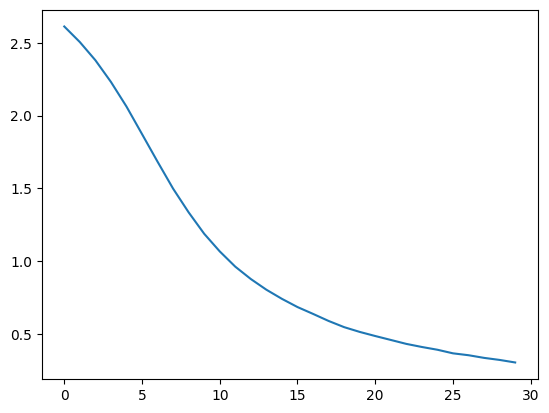

In [11]:
#plot the training and validation accuracy and loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])

In [12]:
test_loss, test_acc = model.evaluate(X_testScaled, y_test)
print('Test accuracy:', test_acc)

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9353 - loss: 0.1875
Test accuracy: 0.9316666722297668


132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


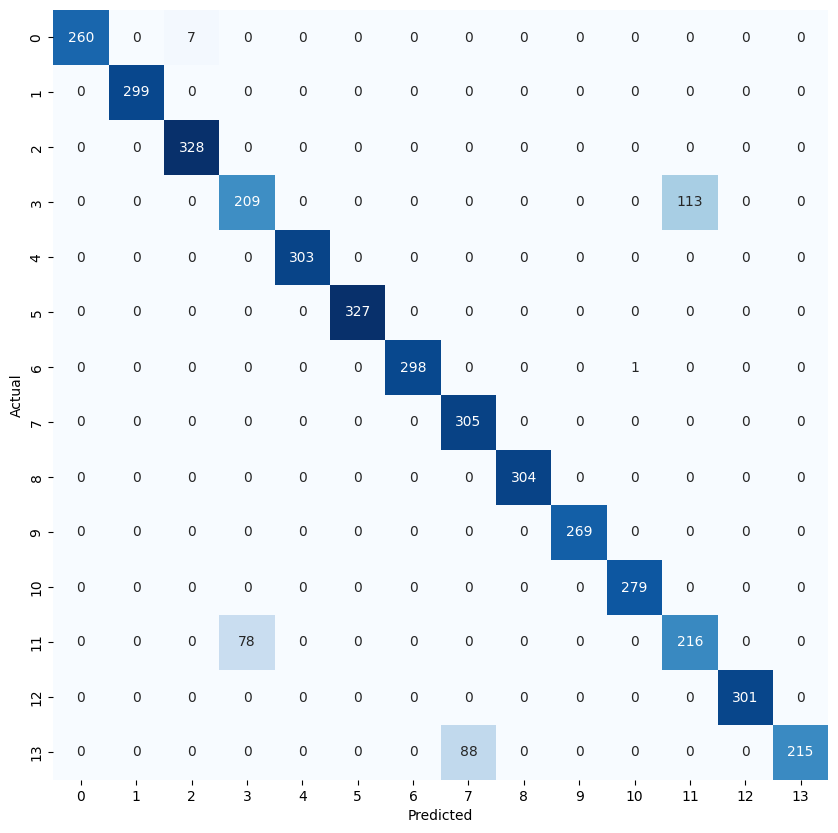

[[260   0   7   0   0   0   0   0   0   0   0   0   0   0]
 [  0 299   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 328   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 209   0   0   0   0   0   0   0 113   0   0]
 [  0   0   0   0 303   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 327   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 298   0   0   0   1   0   0   0]
 [  0   0   0   0   0   0   0 305   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 304   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 269   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 279   0   0   0]
 [  0   0   0  78   0   0   0   0   0   0   0 216   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 301   0]
 [  0   0   0   0   0   0   0  88   0   0   0   0   0 215]]


In [13]:
#confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_testScaled)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(cm)


In [14]:
#predict the label for 
# samples = np.array([[ -3.0, 8.0 ,-13.0 ,-26.0 ,-5.0, 0.955078, 0.07196, 0.160217, -0.238586, 0.0 ,0.0 ,-0.007634 ,-3.352002 ,0.685474 ,9.37771 ,-0.015552 ,0.087329, 0.181836 ,0.077759, 0.044263, 0.18064
# ]])

# samples = np.array([[53.0, 57.0 ,77.0, 70.0, 61.0 ,0.762634, 0.120483, -0.182434, -0.000854, -0.007634, 0.0 ,0.0 ,2.941675, 10.066772, 1.567139, 0.224902, 0.788355, -0.0323 ,-5.040674, -1.160303, -5.80271]])

samples = np.array([[53.0, 52.0 ,87.0, 84.0, 61.0 ,0.762634, 0.120483, -0.182434, -0.000854, -0.007634, 0.0 ,0.0 ,2.941675, 10.066772, 1.567139, 0.224902, 0.788355, -0.0323 ,0.040674, 0.160303, 0.80271]])


# 53.0,57.0,72.0,76.0,59.0,0.98761,0.132263,-0.034302,0.077148,0.343511,0.78626,0.007634,-7.558154,1.027612,3.996802,-8.421875,-1.47981,-5.437134,-7.80459,-1.167578,-6.354688

samples = scaler.transform(samples)
predictions = model.predict(samples)
# predictions =  np.argmax(predictions, axis=1)

print(predictions)

p =  np.argmax(predictions, axis=1)
print(p)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[6.6239544e-04 6.2469475e-04 1.8742486e-06 1.7597510e-07 1.2028371e-05
  1.7870039e-04 4.4906607e-09 1.0410220e-02 3.5923425e-04 1.6405366e-08
  2.9836714e-04 7.0830602e-08 7.9761314e-01 1.8983911e-01]]
[12]


In [15]:

53.0,57.0,72.0,76.0,59.0,0.98761,0.132263,-0.034302,0.077148,0.343511,0.78626,0.007634,-7.558154,1.027612,3.996802,-8.421875,-1.47981,-5.437134,-7.80459,-1.167578,-6.354688

(53.0,
 57.0,
 72.0,
 76.0,
 59.0,
 0.98761,
 0.132263,
 -0.034302,
 0.077148,
 0.343511,
 0.78626,
 0.007634,
 -7.558154,
 1.027612,
 3.996802,
 -8.421875,
 -1.47981,
 -5.437134,
 -7.80459,
 -1.167578,
 -6.354688)

In [16]:
f'{predictions[0][2]:.10f}'

'0.0000018742'